In [1]:
import numpy as np
import json

from ahyper import utils, annotated_hypergraph, observables
from matplotlib import pyplot as plt

import pandas as pd

import numpy as np
import networkx as nx

In [2]:
with open('data/enron_hypergraph_annotated.json') as file:
    data = json.load(file)

roles = ['cc', 'from', 'to']

A = annotated_hypergraph.AnnotatedHypergraph.from_records(data, roles)
A.remove_degeneracies(precedence = {'from' : 1, 'to' : 2, 'cc' : 3})
A.remove_singletons()

Removed 1246 node-edge incidences
Removed 901 singletons.


In [3]:
# test that this quantity is invariant under MCMC

b0 = A.estimate_local_role_densities()
A.MCMC(n_steps = 10000)
b1 = A.estimate_local_role_densities()
(b0 == b1).mean() # should be equal to unity

1.0

In [4]:
b_ = A.estimate_local_role_densities(normalize=False)
# b_

In [5]:
def estimate_B(n_steps = 1000, n_rounds = 100):
    B = np.zeros((A.n, len(A.roles)))
    for j in range(n_rounds):
        A.MCMC(n_steps)
        B += observables.local_role_density(A, as_matrix = True, absolute_values=True)
    B = B/n_rounds
    return(B)

In [6]:
B = estimate_B(100, 100)

In [7]:
np.abs(b_ - B).mean()

46.64974580119458

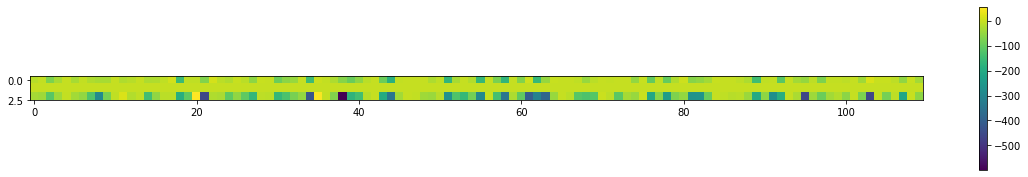

In [8]:
fig = plt.figure(figsize = (20, 3))
plt.imshow(((b_ - B)).T )
plt.colorbar()

In [9]:
np.nanmean(((b_ - B)),axis = 0)

array([ -31.39388167,    0.        , -104.52573662])

In [10]:
B.mean(axis = 0)

array([ 76.62727273, 128.        , 262.39090909])

In [11]:
b_.mean(axis = 0)

array([ 45.23339106, 128.        , 157.86517247])

In [12]:
b_.max(), B.max()

(1511.8997796834828, 1970.81)

In [13]:
A.roles

['cc', 'from', 'to']